In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [2]:
###
### Only used for testing functions.  
###


# Creating a DataFrame based on the csv file output.
# This is handy if our notebook has been reopened and we don't want to pull from the API again.
data_raw = pd.read_csv("../../python-api-challenge/WeatherPy/output_data/cities.csv")
data_raw = data_raw.set_index("city_id")
data_raw.index.name = None
data_raw

# Renaming columns in DataFrame
data_raw = data_raw.rename(columns={
    "city": "City",
    "cloudiness": "Cloudiness",
    "country": "Country",
    "date": "Date",
    "humidity": "Humidity",
    "lat": "Latitude",
    "lng": "Longitude",
    "max_temp": "Max Temp",
    "wind_speed": "Wind Speed"
})
data_raw.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,New Norfolk,67,AU,1619134730,61,-42.7826,147.0587,53.01,4.00
1,São Filipe,54,CV,1619134731,72,14.8961,-24.4956,72.61,9.80
2,Liverpool,9,GB,1619134702,54,53.4106,-2.9779,51.80,6.91
3,Bredasdorp,1,ZA,1619134734,93,-34.5322,20.0403,51.80,2.30
4,Kumul,99,CN,1619134537,31,42.8000,93.4500,46.02,6.20


In [3]:
def line_plot_def(dataframe, x_field, y_field):
    
    # Using the time import.  %x displays the current date.
    date = time.strftime("%x")
    
    # Assigning the entire series of the column names given the appropriate axis.
    x_axis = dataframe[x_field]
    y_axis = dataframe[y_field]

    #Setting title name and x and y labels.
    plt.title(x_field + " vs. " + y_field + " (" + date + ")")
    plt.xlabel(x_field)
    plt.ylabel(y_field)

    #Plot a magenta colored line with Star markers on each value.
    plt.plot(x_axis, y_axis, marker="*", color="m")
    plt.show()

In [4]:
def bar_plot_def(dataframe, x_field, y_field):
    
    # Using the time import.  %x displays the current date.
    date = time.strftime("%x")
    
    # Assigning the entire series of the column names given the appropriate axis.
    x_axis = dataframe[x_field]
    y_axis = dataframe[y_field]
    
    plt.bar(x_axis, y_axis, color='g', alpha=0.75, align="center")
    
    #Determining to display all values in our x_axis variable
    tick_locations = [value for value in x_axis]
    #rotation=90 prints the values from x_axis vertically to remove clutter.
    plt.xticks(tick_locations, x_axis, rotation=90)

    #Setting x and y limits to be relative to what values are.
    plt.xlim(-1, len(x_axis))
    plt.ylim(0, max(y_axis)+25)

    #Setting title name and x and y labels.
    plt.title(x_field + " vs. " + y_field + " (" + date + ")")
    plt.xlabel(x_field)
    plt.ylabel(y_field)

    plt.show()

In [5]:
def scatter_plot_def(dataframe, x_field, y_field):
    
    # A bit redundant, but preserving our original x_field and y_field variables before
    # morphing the xlabel and ylabel in the later for loops.
    xlabel = x_field
    ylabel = y_field
    
    # Assigning the entire series of the column names given the appropriate axis.
    x_axis = dataframe[x_field]
    y_axis = dataframe[y_field]

    # Setting the limit of the x axis to be 10% bigger on each side.
    lim_x = min(x_axis) - ((max(x_axis) - min(x_axis)) / 10), max(x_axis) + ((max(x_axis) - min(x_axis)) / 10)
    # Setting the limit of the y axis to be 20% bigger on each side.  More space for the annotote.
    lim_y = min(y_axis) - ((max(y_axis) - min(y_axis)) / 5), max(y_axis) + ((max(y_axis) - min(y_axis)) / 5)
    
    
    # Using the time import.  %x displays the current date.
    date = time.strftime("%x")
    
    # Scatter plot based on our x_axis variable and y_axis variable.
    plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black")
    
    # Using the imported linregress function with the x_axis and y_axis parameters.
    # Gives us the slope, slope, intercept, rvalue, pvalue, stderr.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)    
    # Creating the equation of the regression line.
    regress_values = x_axis * slope + intercept
    # Creating the string of the equation of the regression line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    # Plotting the regression line.
    plt.plot(x_axis,regress_values,"g-")
    # Annotote is where on the graph the regression line equation is written.
    annotote_x = ((min(x_axis) + max(x_axis))/2)
    annotote_y = min(y_axis) - (max(y_axis) - min(y_axis)) / 7
    # Plotting the equation of the regression line.
    plt.annotate(line_eq,(annotote_x, annotote_y), fontsize=15, color="red")

    #Printing the rvalue.
    print(f"The r-value is {rvalue}")
    
    # Assigning the title string.
    title_str = (xlabel + " vs. " + ylabel + " (" + date + ")")
    # Set the plot title, and x and y axis labels.
    plt.title(title_str)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
    plt.xlim(lim_x)
    #Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
    plt.ylim(lim_y)


    
    plt.show()
    

In [6]:
def box_plot_def(dataframe, x_field):
    plt.boxplot(dataframe[x_field], showfliers=True, vert=True, flierprops=dict(markerfacecolor='y', marker='^'))
    
    plt.title(x_field + " Outliers")
    plt.ylabel(x_field)
    
    plt.tight_layout()
    plt.show()

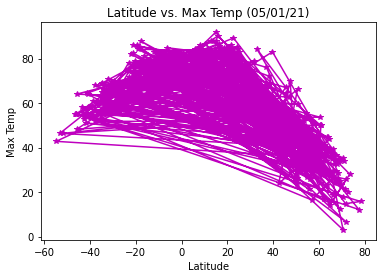

In [7]:
line_plot_def(data_raw, "Latitude", "Max Temp")

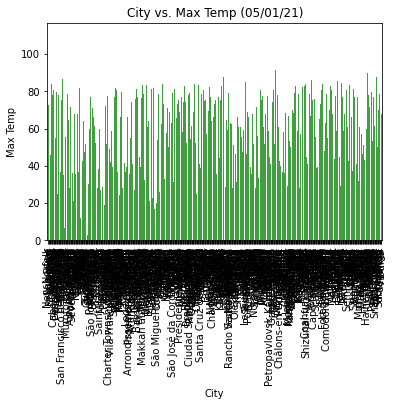

In [8]:
bar_plot_def(data_raw, "City", "Max Temp")

The r-value is 0.06779932365737172


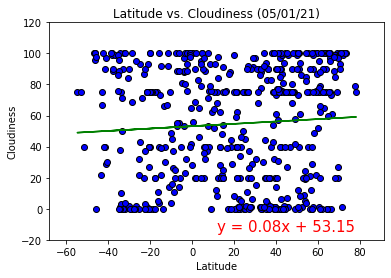

In [9]:
scatter_plot_def(data_raw, "Latitude", "Cloudiness")

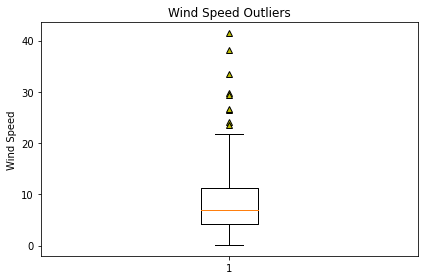

In [10]:
box_plot_def(data_raw, "Wind Speed")

In [ ]:
#####
##### Not working currently!!
#####


def plots_def(dataframe, x_field, y_field, typeplot, regression):
    
    # Setting list of possible graphs that can be created.
    plot_dict = {
        "type_plots": ["line", "bar", "scatter", "boxplot"],
        "plt_name": [plt.line, plt.bar, plt.pie, plt.scatter, plt.boxplot],
        "plt_settings": [(x_axis,y_axis, marker="*", color="m"),
                         (x_axis, y_axis, color='g', alpha=0.75, align="center"),
                         (x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black")
                         (dataframe[x_axis], showfliers=True, vert=True, flierprops=dict(markerfacecolor='y', marker='^'))]
    }
    plot_boolean = False
    
    # Checking to see if the typeplot given matches one of the possible graphs in list.
    for x in type_plots:
        if x == typeplot:
            plot_boolean = True
            break
    
    # If there is no match print error to the user and exit def.
    if plot_boolean == False:
        print("You did not enter a valid typeplot.")
        return
    
    
    
    # A bit redundant, but preserving our original x_field and y_field variables before
    # morphing the xlabel and ylabel in the later for loops.
    xlabel = x_field
    ylabel = y_field
    
    # Assigning the entire series of the column names given the appropriate axis.
    x_axis = dataframe[x_field]
    y_axis = dataframe[y_field]

    # Setting the limit of the x axis to be 10% bigger on each side.
    lim_x = min(x_axis) - ((max(x_axis) - min(x_axis)) / 10), max(x_axis) + ((max(x_axis) - min(x_axis)) / 10)
    # Setting the limit of the y axis to be 20% bigger on each side.  More space for the annotote.
    lim_y = min(y_axis) - ((max(y_axis) - min(y_axis)) / 5), max(y_axis) + ((max(y_axis) - min(y_axis)) / 5)
    
    
    # Using the time import.  %x displays the current date.
    date = time.strftime("%x")
    



    
    
    # Scatter plot based on our x_axis variable and y_axis variable.
    plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black")
    
    
    if regression == True:
        # Using the imported linregress function with the x_axis and y_axis parameters.
        # Gives us the slope, slope, intercept, rvalue, pvalue, stderr.
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)    
        # Creating the equation of the regression line.
        regress_values = x_axis * slope + intercept
        # Creating the string of the equation of the regression line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
        # Plotting the regression line.
        plt.plot(x_axis,regress_values,"g-")
        # Annotote is where on the graph the regression line equation is written.
        annotote_x = ((min(x_axis) + max(x_axis))/2)
        annotote_y = min(y_axis) - (max(y_axis) - min(y_axis)) / 7
        # Plotting the equation of the regression line.
        plt.annotate(line_eq,(annotote_x, annotote_y), fontsize=15, color="red")

        #Printing the rvalue.
        print(f"The r-value is {rvalue}")
               

    # Assigning the title string.
    title_str = (xlabel + " vs. " + ylabel + " (" + date + ")")
    # Set the plot title, and x and y axis labels.
    plt.title(title_str)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
    plt.xlim(lim_x)
    #Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
    plt.ylim(lim_y)


    
    plt.show()
    

In [ ]:
###
### For testing the def above that is currently out of order.
###

#plots_def(data_raw, "Latitude", "Max Temp", "scatter", regression=False)